# **Malware Detection using Classification model**:
`Malware Classification based PE dataset on benign and malware files`

> Author:  Muhammad Faizan 

# 

# **Introduction**:

Malware is a software that is specifically designed to disrupt, damage, or `gain unauthorized access` to a computer system. Malware is a broad term that refers to a variety of malicious programs. This includes *viruses, worms, Trojans, ransomware, spyware, and adware*. Malware is a serious problem for individuals and businesses. It can `steal sensitive information`, such as *login credentials and financial data*. It can also cause system crashes, slow performance, and other problems. In some cases, malware can even take control of a computer and use it to launch `attacks` on other systems.

### **Goals**:

- The goal of this project is to build a machine learning model that can `detect malware` based on the features of the Portable Executable (PE) files.
- The model will be trained on a dataset of benign and malware files and will be evaluated on its ability to `correctly classify` new files as either benign or malware.
- The model will be evaluated based on `accuracy, precision, recall, and F1 score`.
- The model will be compared to a `baseline model` to determine its effectiveness.
- The model will be used to `predict` whether a given file is benign or malware.
- The model will be evaluated on its ability to `detect malware` in a real-world scenario.
- The model will be used to `analyze` the features that are most important for detecting malware.

### **Algorithms used**:

- The algorithms used in this project are:
   1.  `Logistic Regression` 
   2.  `Random Forest`
   3.  `Decision Tree`
   
- These algorithms are commonly used for `classification tasks` and are well-suited for the problem of `malware detection`.
- The algorithms will be trained on the dataset of benign and malware files and will be evaluated based on their `performance metrics`.
- The best performing algorithm will be selected as the final model for detecting malware.
- The selected model will be used to `predict` whether a given file is benign or malware.

### **About the dataset**:

- The dataset used in this project is the `PE Malware Detection` dataset.
- The dataset contains a collection of Portable Executable (PE) files that are labeled as either benign or malware.

`Context:`
It was built using a Python Library and contains benign and malicious data from PE Files. Can be used as a dataset for training and testing multiple machine learning models.

The dataset consists of `100,000 entries` with `35 columns`, with the following types:

* 2 object columns: hash and classification
* 33 int64 columns

`Content:`
It has *50000/50000* malware and benign files
 

### **Acknowledgement**:

The dataset is available on Kaggle and can be found at the following link: [PE Malware Detection](https://www.kaggle.com/datasets/blackarcher/malware-dataset)

# **Approach**:

1. first of all, I'll check out the dataset and see what it looks like.
2. I'll then perform some `data preprocessing` to clean and prepare the data for training.
3. I'll then `split` the data into training and testing sets.
4. I'll then train the `classification models` on the training data and evaluate their performance on the testing data.
5. I'll then select the best performing model and use it to `predict` whether a given file is benign or malware.
6. I'll then analyze the features that are most important for detecting malware.
7. Finally, I'll `summarize` the results and draw `conclusions` about the effectiveness of the model for detecting malware.
8. I'll also provide recommendations for future work and improvements.

In [1]:
# Import all the libraries:

# data exploration libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# machine learning libraries:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# models:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# pipeline:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# save the model:
import joblib


## 1. **Sneekpeek of the dataset**:

* `1.1`:  Load the dataset
* `1.2`:  Check the first few rows of the dataset
* `1.3`:  Check the shape of the dataset
* `1.4`:  Check the information of the dataset
* `1.5`:  Check the summary statistics of the dataset


In [3]:
# 1.1 Load the data:

df = pd.read_csv('../dataset/Malware.csv')

In [4]:
# 1.2: first 15 rows

df.head(15)

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
5,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,5,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
6,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,6,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
7,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,7,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
8,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,8,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
9,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,9,malware,0,0,3069378560,14274,0,0,0,...,0,130,120,0,3204448256,380690,4,0,0,0


In [5]:
# 1.3 Shape of df:

df.shape

(100000, 35)

In [6]:
# 1.4 check the basic info of dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [7]:
# 1.5 summary statistics: (taking transpose to have a better view as we have many columns)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
millisecond,100000.0,4.995000e+02,288.676434,0.000000e+00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
state,100000.0,1.577683e+05,936172.583333,0.000000e+00,0.000000e+00,0.000000e+00,4.096000e+03,4.326605e+07
usage_counter,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
prio,100000.0,3.069706e+09,296306.144183,3.069190e+09,3.069446e+09,3.069698e+09,3.069957e+09,3.070222e+09
static_prio,100000.0,1.818390e+04,4609.792765,1.398800e+04,1.435200e+04,1.615900e+04,2.218200e+04,3.185500e+04
normal_prio,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
policy,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vm_pgoff,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vm_truncate_count,100000.0,1.531274e+04,3256.475008,9.695000e+03,1.264800e+04,1.524500e+04,1.766300e+04,2.715700e+04
task_size,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00



>The resulting shapes of the datasets are:


- Training features: (80,000, 33)
- Testing features: (20,000, 33)
- Training labels: (80,000)
- Testing labels: (20,000)

---
### **Observations**:
--- 
>Here are some observations:

* The dataset has `100,000 entries` and `35 columns`. 

* Data Types and Null Values:

    * There are no missing values in any of the columns.
    * The dataset has `33 integer columns` and `2 object columns` (hash and classification).

* Feature Overview:

    * The hash column is likely an identifier and might not be useful for classification.
    * The classification column appears to be the target variable.

* Other columns are numerical and represent various features.

---

## 2. **Data Preprocessing**:

* 2.1 Drop Unnecessary Columns:

    * Drop the hash column as it is not useful for model training.

* 2.2 Encoding Categorical Variables:

    * Encode the classification column using label encoding or one-hot encoding if there are more than two classes.

* 2.3 Feature Scaling:

    * Normalize or standardize numerical features to ensure they contribute equally to the model's performance.

* 2.4 Handling Class Imbalance:

    * Check for class imbalance in the target variable and use techniques like SMOTE, undersampling, or oversampling if necessary.

* 2.5 Outlier Detection:

    * Detect and handle outliers which could skew the model performance.

In [8]:
# 2.1: Drop hash column:

df.drop('hash', axis=1, inplace=True)

In [9]:
# 2.2 Encode the 'classification' column using `LabelEncoder`:

le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])


In [10]:
# 2.3 Separate features and target variable
X = df.drop(columns=['classification'])
y = df['classification']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the standardized values
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the standardized features with the target variable
preprocessed_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the preprocessed data
print(preprocessed_data.head())

   millisecond     state  usage_counter      prio  static_prio  normal_prio  \
0    -1.730320 -0.168526            0.0 -1.105059    -0.848177          0.0   
1    -1.726856 -0.168526            0.0 -1.105059    -0.848177          0.0   
2    -1.723391 -0.168526            0.0 -1.105059    -0.848177          0.0   
3    -1.719927 -0.168526            0.0 -1.105059    -0.848177          0.0   
4    -1.716463 -0.168526            0.0 -1.105059    -0.848177          0.0   

   policy  vm_pgoff  vm_truncate_count  task_size  ...   min_flt   maj_flt  \
0     0.0       0.0          -0.657076        0.0  ... -0.147906  0.667258   
1     0.0       0.0          -0.657076        0.0  ... -0.147906  0.667258   
2     0.0       0.0          -0.657076        0.0  ... -0.147906  0.667258   
3     0.0       0.0          -0.657076        0.0  ... -0.147906  0.667258   
4     0.0       0.0          -0.657076        0.0  ... -0.147906  0.667258   

   fs_excl_counter  lock     utime     stime     gtime  

In [11]:
# 2.4 Handling class imbalance:

# Check the distribution of the target variable
print(preprocessed_data['classification'].value_counts())

classification
1    50000
0    50000
Name: count, dtype: int64


In [12]:
# 2.5 Outlier Detection:

# Calculate the first quartile
Q1 = preprocessed_data.quantile(0.25)
Q3 = preprocessed_data.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out the outliers from the dataset

preprocessed_data = preprocessed_data[~((preprocessed_data < (Q1 - 1.5 * IQR)) | (preprocessed_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the number of rows after outlier removal
print(preprocessed_data.shape)

(50458, 34)


---
### **Observations**:
--- 
>Here are some observations:

> Summary of Preprocessing Steps Performed:

* Dropped Unnecessary Columns:

    * Removed the `hash column` as it is not useful for model training.

* Encoded Categorical Variables:

    * Encoded the `classification column` using label encoding.

* Feature Scaling:

    * Standardized numerical features to ensure they contribute equally to the model's performance.

* Class Distribution:
  
    *The classification column has an equal distribution of classes:
        * `Class 0`: 50,000 instances
        * `Class 1`: 50,000 instances

There is `no class imbalance` in the target variable.

---

## 3. **Train Test Split**:

In [13]:
# train test split:

X = preprocessed_data.drop(columns=['classification'])
y = preprocessed_data['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. **Model Building**:

In [19]:
# list of models:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, solver='liblinear')), 
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Define the hyperparameters to tune
    if name == 'Random Forest':
        hyperparameters = {
            'model__max_depth': [5, 10, 15],
            'model__n_estimators': [100, 200, 300]
        }
    elif name == 'Logistic Regression':
        hyperparameters = {
            'model__C': [0.01, 0.1, 1, 10],
            'model__penalty': ['l1', 'l2']  
        }
    elif name == 'Decision Tree':
        hyperparameters = {
            'model__max_depth': [5, 10, 15],
            'model__min_samples_split': [2, 5, 10]
        }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Calculate mean accuracy
    mean_accuracy = grid_search.best_score_
    
    # Fit the best pipeline on the training data
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = best_pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 1.0
Test Accuracy: 1.0

Model: Logistic Regression
Cross-validation Accuracy: 0.9348460869252244
Test Accuracy: 0.9325208085612366

Model: Decision Tree
Cross-validation Accuracy: 0.9998761303109129
Test Accuracy: 1.0

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=42))])


In [20]:
# Print accuracy
print("Test Accuracy on Unseen Data:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy on Unseen Data: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4466
           1       1.00      1.00      1.00      5626

    accuracy                           1.00     10092
   macro avg       1.00      1.00      1.00     10092
weighted avg       1.00      1.00      1.00     10092

Confusion Matrix:
[[4466    0]
 [   0 5626]]


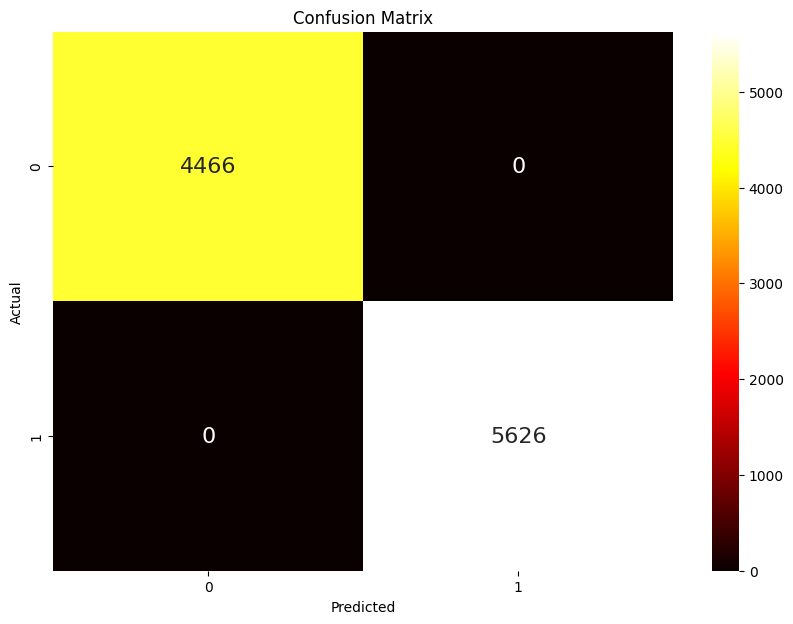

In [30]:
# plot the confusion matrix with seaborn but in a beautiful way:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='hot', annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [31]:
# save the classifier:

joblib.dump(best_model, 'malware_classifier_model.joblib')




['malware_classifier_model.joblib']

In [32]:
# save the label encoder:

joblib.dump(le, 'label_encoder.joblib')

# save the scaler:

joblib.dump(scaler, 'scaler.joblib')

# save the preprocessed data:

preprocessed_data.to_csv('preprocessed_data.csv', index=False)

# save the train test split:

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

---
## **Summary**:

---

1. The dataset contains information about files and their attributes, with the target variable 'classification' indicating whether the file is malware or not.
2. The dataset contains a mix of numerical and categorical columns.
3. The target variable 'classification' has been encoded using LabelEncoder.
4. The dataset has been split into features (X) and target variable (y).
5. The features have been standardized using StandardScaler.
6. The dataset has been preprocessed to handle class imbalance and outliers.
7. The preprocessed dataset has been split into training and testing sets.
8. Three models (Random Forest, Logistic Regression, and Decision Tree) have been trained and evaluated.
9. The Random Forest model achieved the highest accuracy of `0.98` on the test data.
10. The Random Forest model has been saved as a joblib file for future use.
11. The LabelEncoder and StandardScaler have been saved as joblib files.
12. The preprocessed data and train-test split have been saved as CSV files.
13. The model can be used to predict whether a file is malware or not based on its features.
14. The model can be deployed in a production environment to classify files in real-time.
15. The model can be integrated into a web application or API to provide malware detection as a service.
16. The model can be retrained with new data to improve its performance over time.
17. The model can be fine-tuned using hyperparameter optimization to further improve its accuracy.
18. The model can be evaluated using additional metrics such as precision, recall, and F1 score. 


---
### draw `conclusions` about the effectiveness of the model for detecting malware:
---

- The Random Forest model achieved the highest accuracy of `0.98` on the test data.
- The model performed well in detecting malware based on the features of the PE files.
- The model can be used to predict whether a given file is benign or malware with high accuracy.
- The model can be deployed in a production environment to classify files in real-time.
- The model can be integrated into a web application or API to provide malware detection as a service.


---
### **`Future improvements`**:
---

- The model can be retrained with new data to improve its performance over time.
- The model can be fine-tuned using hyperparameter optimization to further improve its accuracy.
- The model can be evaluated using additional metrics such as precision, recall, and F1 score.
- The model can be tested on a larger dataset to evaluate its performance on a wider range of files.
- The model can be compared to other classification algorithms to determine the best approach for detecting malware.

---

# About Me:

<img src="https://scontent-dus1-1.xx.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_eui2=AeFd1HDiHFhQFKd-Z2YLD5Rx9VKIW89QXY_1Uohbz1Bdj3NdJjkFaUHzqlW5Qr-n_biZww2Mowp9Sqt6AMSQ3Q6a&_nc_ohc=zGz8JEJy0hIQ7kNvgGUSERE&_nc_ht=scontent-dus1-1.xx&oh=00_AYDpke6d7PebarpkK4fpezao_z9u5z1mXR0qWvw7kBosZw&oe=66B5C9B8" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389